# Car Accident Severity Prediction

### Ruth Hashkes, September 25th, 2020

### Exploring the Data

Load the Seattle Car Collision Dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
other_path = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df = pd.read_csv(other_path, low_memory=False)
df.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

Check for missing data

In [4]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

Remove unique identifier column, columns filled with one value, geolocations, and missing and redundant columns

In [5]:
df.drop(['OBJECTID', 'INCKEY', 'COLDETKEY','REPORTNO', 'STATUS', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'INCDATE', 'INTKEY', 'SEVERITYDESC',
         'SDOTCOLNUM', 'ST_COLCODE'], axis='columns', inplace=True)

Replace unkown or other values with null

In [6]:
df.replace(to_replace={'Unknown': np.nan, 'Other':np.nan}, inplace=True)

Replace the null cells in columns "Inattention", "Pedestrian right of way not granted" and "Speeding" with 0, and the Y with 1 and fix the coding in "Under the influence" column

In [7]:
df['INATTENTIONIND'].replace(np.nan, 0, inplace=True)
df['INATTENTIONIND'].replace('Y', 1, inplace=True)

df['PEDROWNOTGRNT'].replace(np.nan, 0, inplace=True)
df['PEDROWNOTGRNT'].replace('Y', 1, inplace=True)

df['HITPARKEDCAR'].replace('N', 0, inplace=True)
df['HITPARKEDCAR'].replace('Y', 1, inplace=True)

df['SPEEDING'].replace(np.nan, 0, inplace=True)
df['SPEEDING'].replace('Y', 1, inplace=True)

df['UNDERINFL'].replace(to_replace={'Y':1, 'N':0, '1':1, '0':0}, inplace=True)


In [8]:
df.isnull().sum()

SEVERITYCODE          0
X                  5334
Y                  5334
ADDRTYPE           1926
LOCATION           2677
COLLISIONTYPE     28607
PERSONCOUNT           0
PEDCOUNT              0
PEDCYLCOUNT           0
VEHCOUNT              0
INCDTTM               0
JUNCTIONTYPE       6338
SDOT_COLCODE          0
SDOT_COLDESC          0
INATTENTIONIND        0
UNDERINFL          4884
WEATHER           21004
ROADCOND          20222
LIGHTCOND         18878
PEDROWNOTGRNT         0
SPEEDING              0
ST_COLDESC         4904
SEGLANEKEY            0
CROSSWALKKEY          0
HITPARKEDCAR          0
dtype: int64

In [9]:
df1 = df.dropna()

In [10]:
df1.shape

(143747, 25)

In [11]:
df1.isnull().sum()

SEVERITYCODE      0
X                 0
Y                 0
ADDRTYPE          0
LOCATION          0
COLLISIONTYPE     0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INCDTTM           0
JUNCTIONTYPE      0
SDOT_COLCODE      0
SDOT_COLDESC      0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
PEDROWNOTGRNT     0
SPEEDING          0
ST_COLDESC        0
SEGLANEKEY        0
CROSSWALKKEY      0
HITPARKEDCAR      0
dtype: int64

In [12]:
df1.head(5)

,SEVERITYCODE,X,Y,ADDRTYPE,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,5TH AVE NE AND NE 103RD ST,Angles,2,0,0,2,...,0.0,Overcast,Wet,Daylight,0,0,Entering at angle,0,0,0
1,1,-122.347294,47.647172,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,0,0,2,...,0.0,Raining,Wet,Dark - Street Lights On,0,0,From same direction - both going straight - bo...,0,0,0
2,1,-122.334540,47.607871,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,0,0,3,...,0.0,Overcast,Dry,Daylight,0,0,One parked--one moving,0,0,0
4,2,-122.306426,47.545739,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,0,2,...,0.0,Raining,Wet,Daylight,0,0,Entering at angle,0,0,0
5,1,-122.387598,47.690575,Intersection,24TH AVE NW AND NW 85TH ST,Angles,2,0,0,2,...,0.0,Clear,Dry,Daylight,0,0,Entering at angle,0,0,0


**Diving into the data**

Categorical Variables:

*Dependant variable: Severity*

In [13]:
df1['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,94821
2,48926


We can see that 2/3 of the data is of the low severity collision (Property Damage Only Collision) and a 1/3 is of the high severity collistion (Injury Collision)

*Independant variables:*

In [14]:
df1['ADDRTYPE'].value_counts().to_frame()

,ADDRTYPE
Block,86383
Intersection,57364


In [15]:
df1['COLLISIONTYPE'].value_counts().to_frame()

,COLLISIONTYPE
Angles,33577
Parked Car,32261
Rear Ended,31535
Sideswipe,17020
Left Turn,13269
Pedestrian,6226
Cycles,5163
Right Turn,2774
Head On,1922


In [16]:
df1['WEATHER'].value_counts().to_frame()

,WEATHER
Clear,93353
Raining,26673
Overcast,22543
Snowing,622
Fog/Smog/Smoke,419
Sleet/Hail/Freezing Rain,79
Blowing Sand/Dirt,39
Severe Crosswind,15
Partly Cloudy,4


In [17]:
df1['ROADCOND'].value_counts().to_frame()

,ROADCOND
Dry,104355
Wet,37981
Ice,682
Snow/Slush,629
Standing Water,49
Sand/Mud/Dirt,30
Oil,21


In [18]:
df1['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,97737
Dark - Street Lights On,37311
Dusk,4860
Dawn,1920
Dark - No Street Lights,1031
Dark - Street Lights Off,882
Dark - Unknown Lighting,6


In [19]:
df1['INATTENTIONIND'].value_counts().to_frame()

,INATTENTIONIND
0,118461
1,25286


In [20]:
df1 = df1[df1['UNDERINFL'].notnull()].copy()
df1['UNDERINFL'] = df1['UNDERINFL'].astype('int64')
df1['UNDERINFL'].value_counts().to_frame()

,UNDERINFL
0,137446
1,6301


In [21]:
df1['PEDROWNOTGRNT'].value_counts().to_frame()

,PEDROWNOTGRNT
0,139294
1,4453


In [22]:
df1['SPEEDING'].value_counts().to_frame()

,SPEEDING
0,138486
1,5261


In [23]:
df1['HITPARKEDCAR'].value_counts().to_frame()

,HITPARKEDCAR
0,139373
1,4374


Numeric Variables:

In [24]:
df1[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']].describe()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
count,143747.000000,143747.000000,143747.000000,143747.000000
mean,2.614587,0.047013,0.036516,2.049448
std,1.382034,0.221371,0.189084,0.532960
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,2.000000
50%,2.000000,0.000000,0.000000,2.000000
75%,3.000000,0.000000,0.000000,2.000000
max,54.000000,6.000000,2.000000,12.000000


Date variable:

In [25]:
df1 = df1[df1['INCDTTM'].notnull()].copy()
df1['INCDTTM'] =  pd.to_datetime(df1['INCDTTM'])

In [26]:
df1['INCDTTM']

0        2013-03-27 14:54:00
1        2006-12-20 18:55:00
2        2004-11-18 10:20:00
4        2004-01-28 08:04:00
5        2019-04-20 17:42:00
                 ...        
194668   2018-11-12 08:12:00
194669   2018-12-18 09:14:00
194670   2019-01-19 09:25:00
194671   2019-01-15 16:48:00
194672   2018-11-30 15:45:00
Name: INCDTTM, Length: 143747, dtype: datetime64[ns]

In [27]:
df1['year'] = pd.DatetimeIndex(df1['INCDTTM']).year
df1['month'] = pd.DatetimeIndex(df1['INCDTTM']).month
df1['weekday'] = pd.DatetimeIndex(df1['INCDTTM']).dayofweek

In [28]:
df1['year'].value_counts().to_frame()

,year
2006,11369
2005,11312
2007,10683
2008,9615
2004,9011
2015,8835
2016,8763
2017,8635
2009,8635
2014,8606


In [29]:
df1['month'].value_counts().to_frame()

,month
10,13016
6,12627
5,12492
7,12383
8,12193
3,12046
9,12008
4,12001
11,11958
1,11889


In [30]:
df1['weekday'].value_counts().to_frame()

,weekday
4,24084
3,21921
2,21504
1,21362
5,19953
0,19324
6,15599


The day of the week with Monday=0, Sunday=6. We can see most accidents happen on Friday.

#### Visualizing the Data

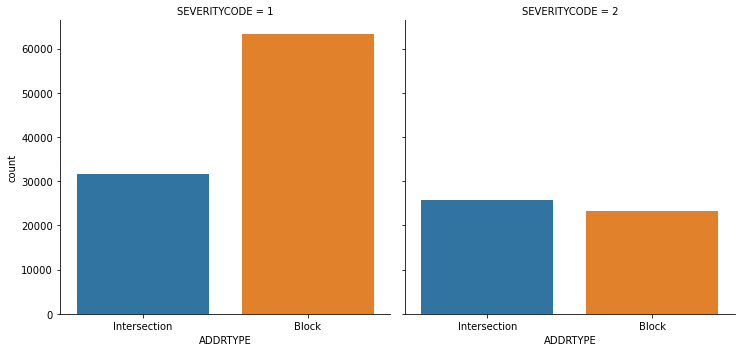

In [31]:
sns.catplot("ADDRTYPE", col = "SEVERITYCODE", col_wrap = 3, data = df1, kind = "count")
plt.show()

We can see for most low severity collisions, the accident took place on a block, but for high severity collisions there is no difference.

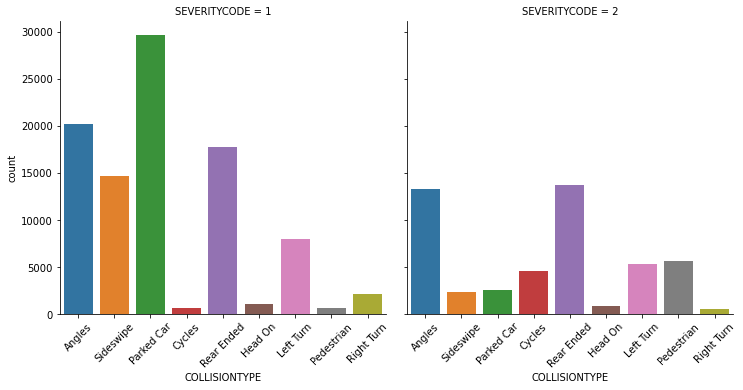

In [32]:
g = sns.catplot("COLLISIONTYPE", col = "SEVERITYCODE", col_wrap = 3, data = df1, kind = "count")
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

Sideswipes and collisions with parked cars seem to be more connected to low severity, while pedestrian and cycles collisions seem to end more severe.

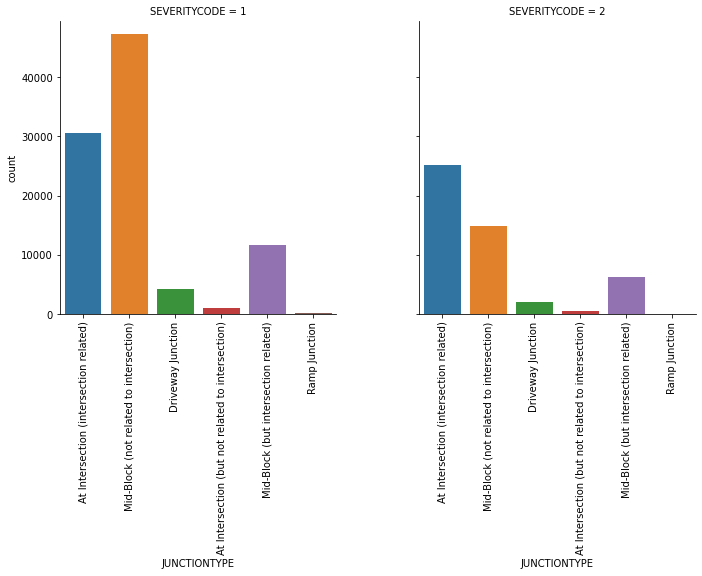

In [33]:
g = sns.catplot("JUNCTIONTYPE", col = "SEVERITYCODE", col_wrap = 3, data = df1, kind = "count")
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

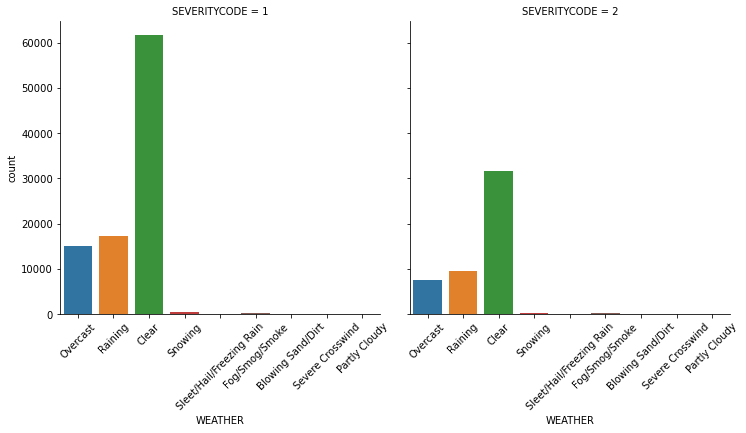

In [34]:
g = sns.catplot("WEATHER", col = "SEVERITYCODE", col_wrap = 3, data = df1, kind = "count")
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

Pattern of weather conditions seem similar between severities

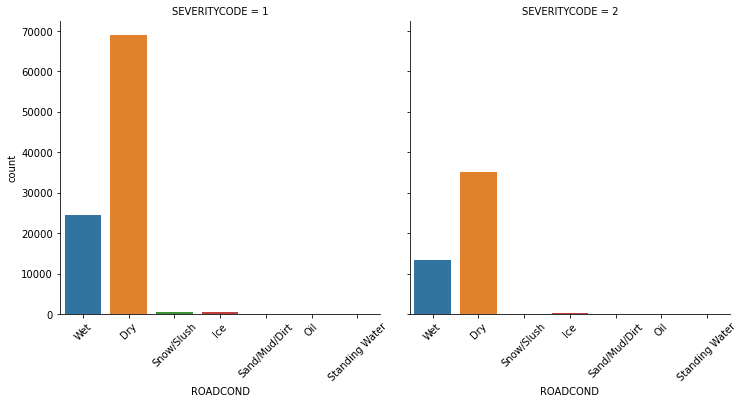

In [35]:
g = sns.catplot("ROADCOND", col = "SEVERITYCODE", col_wrap = 3, data = df1, kind = "count")
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

Pattern of road conditions seem similar between severities

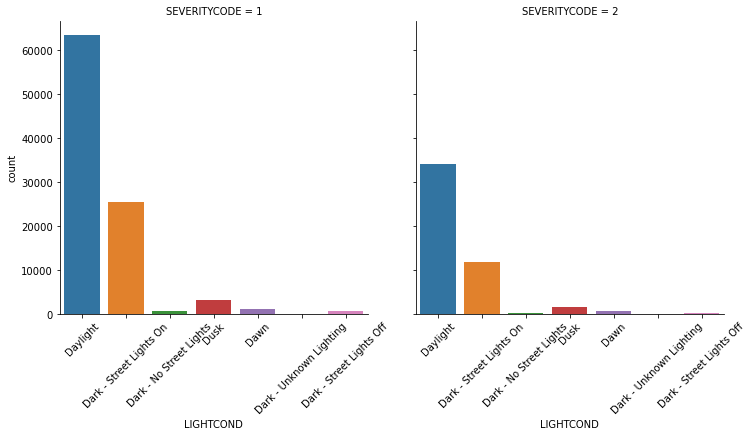

In [36]:
g = sns.catplot("LIGHTCOND", col = "SEVERITYCODE", col_wrap = 3, data = df1, kind = "count")
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

Pattern of light conditions seem similar between severities

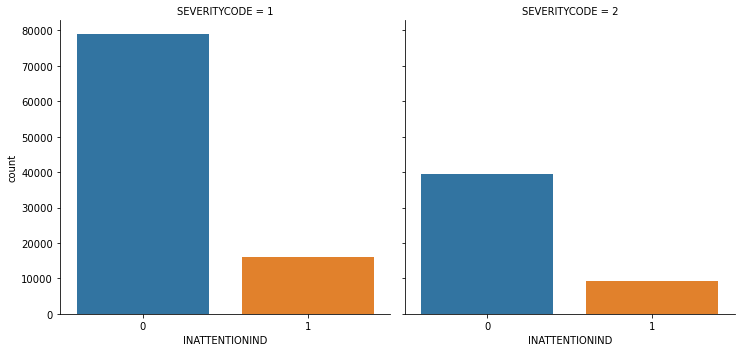

In [37]:
g = sns.catplot("INATTENTIONIND", col = "SEVERITYCODE", col_wrap = 3, data = df1, kind = "count")
plt.show()

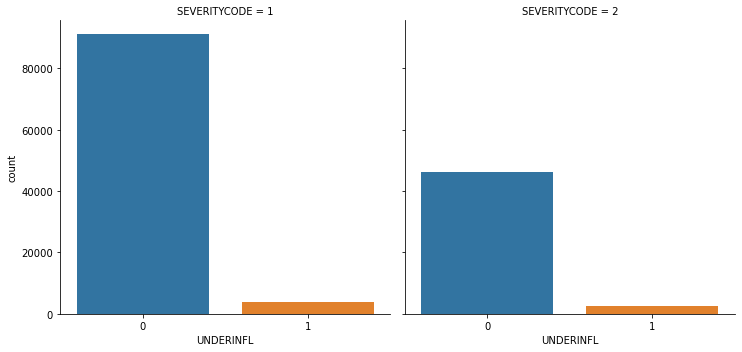

In [38]:
g = sns.catplot("UNDERINFL", col = "SEVERITYCODE", col_wrap = 3, data = df1, kind = "count")
plt.show()

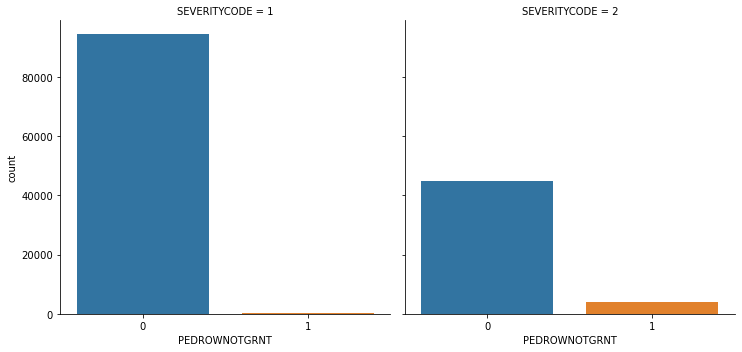

In [39]:
g = sns.catplot("PEDROWNOTGRNT", col = "SEVERITYCODE", col_wrap = 3, data = df1, kind = "count")
plt.show()

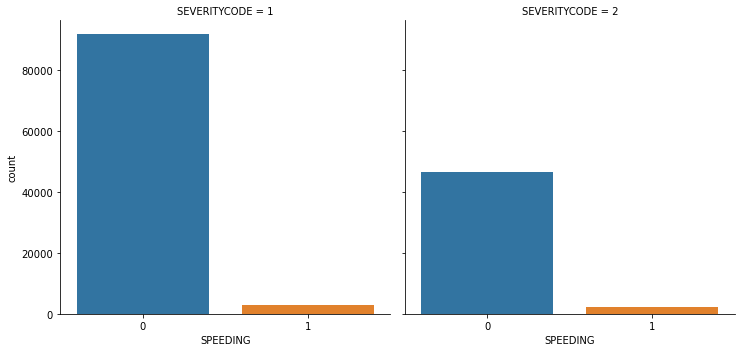

In [40]:
g = sns.catplot("SPEEDING", col = "SEVERITYCODE", col_wrap = 3, data = df1, kind = "count")
plt.show()

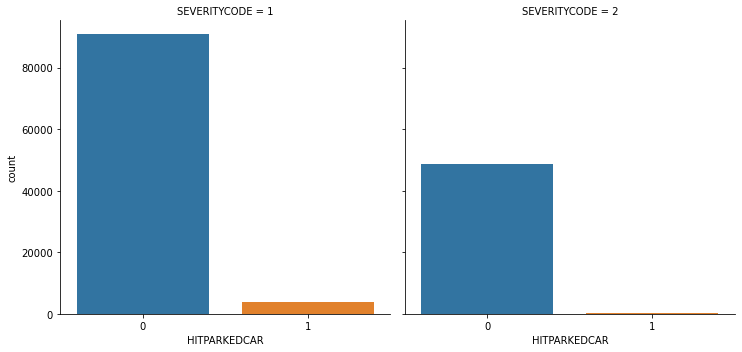

In [41]:
g = sns.catplot("HITPARKEDCAR", col = "SEVERITYCODE", col_wrap = 3, data = df1, kind = "count")
plt.show()

It seems that inattention, driving under the influence of alcohol or drugs, no granting pedestrian right of way, and speeding, all have connections to higher severity of collision, while hitting a parked car does not.

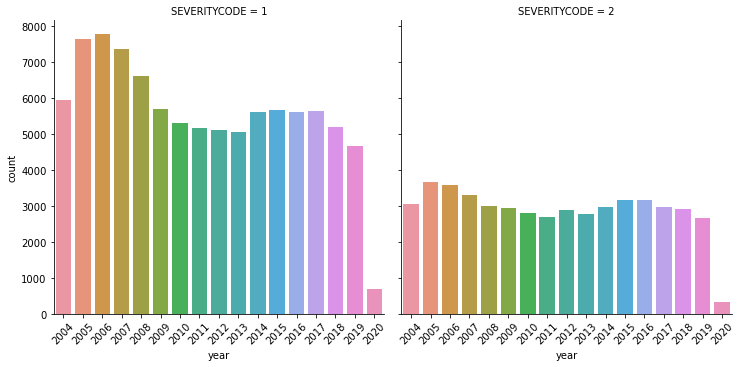

In [42]:
g = sns.catplot("year", col = "SEVERITYCODE", col_wrap = 3, data = df1, kind = "count")
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

We Can see a decrease in low severity collisions over the years from 8000 to 5000, but high severity collisions stayed quite the same around 3000 a year. 

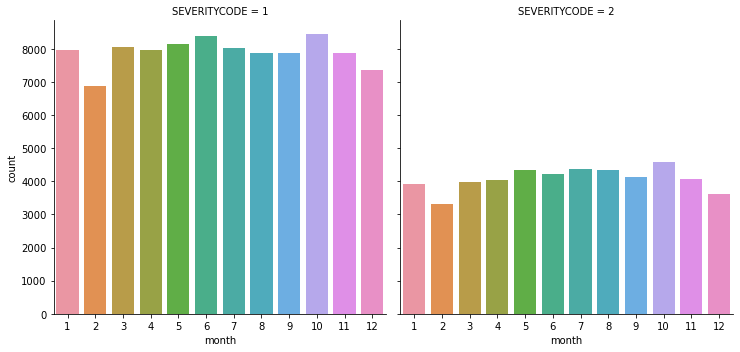

In [43]:
g = sns.catplot("month", col = "SEVERITYCODE", col_wrap = 3, data = df1, kind = "count")
plt.show()

It seems there is no connection between the severity and the month of collision

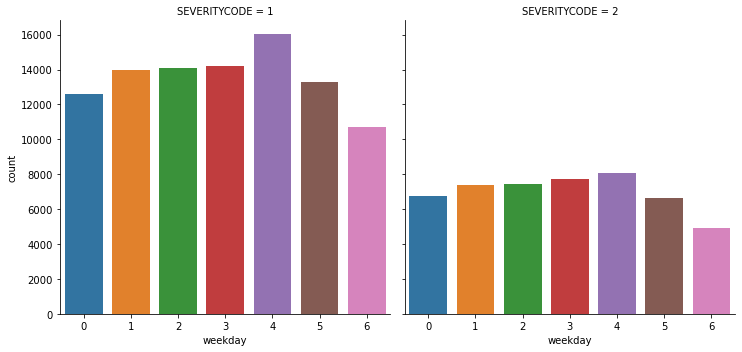

In [44]:
g = sns.catplot("weekday", col = "SEVERITYCODE", col_wrap = 3, data = df1, kind = "count")
plt.show()

The pattern of collision numbers per week day seems similar between severities. We Can see the maximum collision number happens on Fridays and then goes down to the lowest on Sundays

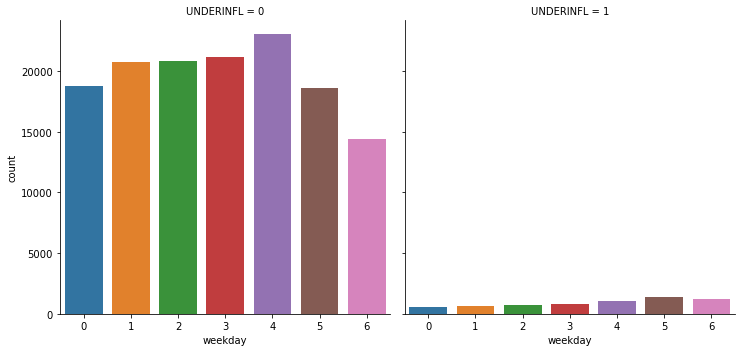

In [45]:
g = sns.catplot("weekday", col = "UNDERINFL", col_wrap = 3, data = df1, kind = "count")
plt.show()

Collisions under the influence of drugs or alcohol are more common on Saturdays and Sundays as opposed to those not under the influence which are most common on Fridays 

<AxesSubplot:>

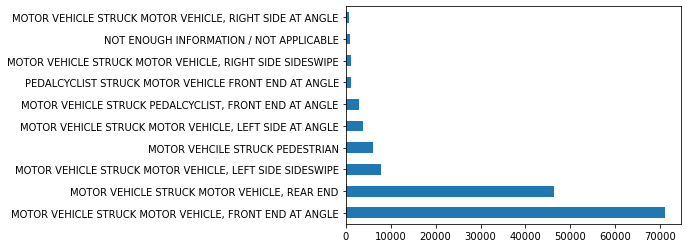

In [46]:
df1['SDOT_COLDESC'].value_counts().head(10).plot.barh()

#### Predictive Modeling

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, r2_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


**Preparing the data**

One hot encoding for categorical variables

In [48]:
df2 = df1[['ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','JUNCTIONTYPE',
         'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
        'month', 'weekday', 'SEVERITYCODE']]
df2 = pd.concat([df2.drop(['ADDRTYPE','COLLISIONTYPE','WEATHER', 'ROADCOND', 'LIGHTCOND',
                          'JUNCTIONTYPE'], axis=1),
                 pd.get_dummies(df2['ADDRTYPE']),
                 pd.get_dummies(df2['COLLISIONTYPE']),
                 pd.get_dummies(df2['WEATHER']),
                 pd.get_dummies(df2['ROADCOND']),
                 pd.get_dummies(df2['LIGHTCOND']),
                 pd.get_dummies(df2['JUNCTIONTYPE'])], axis=1)
df2.reset_index(drop=True, inplace=True)

Splitting the data into train and test sets

In [49]:
x = df2.drop(['SEVERITYCODE'], axis=1)           
y = df2['SEVERITYCODE']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

Normalizing the data

In [50]:
X_train = StandardScaler().fit(X_train).transform(X_train)
X_test = StandardScaler().fit(X_test).transform(X_test)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


In [51]:
print("Train set size")
print(X_train.shape)
print(y_train.shape)
print('')
print("Test set size")
print(X_test.shape)
print(y_test.shape)

Train set size
(114997, 51)
(114997,)

Test set size
(28750, 51)
(28750,)


**K-Nearest Neighbors Algorithm**

In [52]:
k = 10
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [ ]:
knn_pred = knn.predict(X_test)
knn_pred

In [ ]:
print('Score:',accuracy_score(knn_pred, y_test))
print('F1-Score:',f1_score(knn_pred, y_test))
print('')
print('Confusion Martix:')
print(confusion_matrix(y_test, knn_pred))
print('')
print('Classification Report:')
print (classification_report(y_test, knn_pred))

In [ ]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    pred=knn.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, pred)

    
    std_acc[n-1]=np.std(pred==y_test)/np.sqrt(pred.shape[0])

mean_acc

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

**Random Forest Algorithm**

In [ ]:
forest_model = RandomForestClassifier(n_estimators=75)
forest_model.fit(x_train, y_train)
print(forest_model)
yhat2 = forest_model.predict(x_test)
print('the accuracy score for Random Forest Classifier is {}'.format(accuracy_score(y_test, yhat2)))

In [ ]:
print(classification_report(y_test, yhat2))

**Logistic Regression Algorithm**

In [ ]:
log_reg_model = LogisticRegression(C=0.01)
log_reg_model.fit(x_train, y_train)
print(log_reg_model)
yhat3 = log_reg_model.predict(x_test)
print('The accuracy score for logistic regression is {}'.format(accuracy_score(y_test, yhat3)))

In [ ]:
print(classification_report(y_test, yhat3))


**Algorithms Comparison**

In [ ]:
plt.bar(['DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression'], [1.,1.,1.])
plt.ylabel('accuracy')
plt.xlabel('machine learning models')
plt.show()